In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Paramerter Set


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# test_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/test.tsv", delimiter="\t")
# train_df = pd.read_csv("/content/drive/MyDrive/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/train.tsv", delimiter="\t")

test_df = pd.read_csv("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/test.tsv", delimiter="\t")
train_df = pd.read_csv("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/train.tsv", delimiter="\t")

In [ ]:
import datetime

def day_of_year(date_str):
    date = datetime.datetime.strptime(date_str, "%Y-%m-%d")
    first_day = datetime.datetime(date.year, 1, 1)
    delta = date - first_day
    return delta.days + 1
day_of_year_vec = np.vectorize(day_of_year)

In [ ]:
test_np = test_df.to_numpy()
print(test_np)
train_np = train_df.to_numpy()
print(train_np)

[[8646 '2012-01-01' 1 ... 0.3788 0.66 0.0]
 [8647 '2012-01-01' 1 ... 0.3485 0.66 0.1343]
 [8648 '2012-01-01' 1 ... 0.3485 0.76 0.0]
 ...
 [17377 '2012-12-31' 1 ... 0.2576 0.6 0.1642]
 [17378 '2012-12-31' 1 ... 0.2727 0.56 0.1343]
 [17379 '2012-12-31' 1 ... 0.2727 0.65 0.1343]]
[[1 '2011-01-01' 1 ... 0.81 0.0 16]
 [2 '2011-01-01' 1 ... 0.8 0.0 40]
 [3 '2011-01-01' 1 ... 0.8 0.0 32]
 ...
 [8643 '2011-12-31' 1 ... 0.58 0.1939999999999999 52]
 [8644 '2011-12-31' 1 ... 0.62 0.1343 38]
 [8645 '2011-12-31' 1 ... 0.66 0.0 31]]


In [ ]:
train_prm = train_np[:, 1:-1]
display(train_prm)
train_trg = train_np[:, -1]
display(train_trg)

test_prm = test_np[:, 1:]
display(test_prm)

array([['2011-01-01', 1, 0, ..., 0.2879, 0.81, 0.0],
       ['2011-01-01', 1, 0, ..., 0.2727, 0.8, 0.0],
       ['2011-01-01', 1, 0, ..., 0.2727, 0.8, 0.0],
       ...,
       ['2011-12-31', 1, 0, ..., 0.4091, 0.58, 0.1939999999999999],
       ['2011-12-31', 1, 0, ..., 0.3939, 0.62, 0.1343],
       ['2011-12-31', 1, 0, ..., 0.3788, 0.66, 0.0]], dtype=object)

array([16, 40, 32, ..., 52, 38, 31], dtype=object)

array([['2012-01-01', 1, 1, ..., 0.3788, 0.66, 0.0],
       ['2012-01-01', 1, 1, ..., 0.3485, 0.66, 0.1343],
       ['2012-01-01', 1, 1, ..., 0.3485, 0.76, 0.0],
       ...,
       ['2012-12-31', 1, 1, ..., 0.2576, 0.6, 0.1642],
       ['2012-12-31', 1, 1, ..., 0.2727, 0.56, 0.1343],
       ['2012-12-31', 1, 1, ..., 0.2727, 0.65, 0.1343]], dtype=object)

# RNN2 try1

In [ ]:
train_prm[:, 0] = day_of_year_vec(train_prm[:, 0])#/365
# train_prm[:, 1] = train_prm[:, 1]/4
# train_prm[:, 3] = train_prm[:, 3]/12
# train_prm[:, 4] = train_prm[:, 4]/24
# train_prm[:, 6] = train_prm[:, 6]/6
# train_prm[:, 7] = train_prm[:, 7]/4
train_prm = train_prm.astype(float)
print(train_prm)
train_trg = train_trg.astype(int)

test_prm[:, 0] = day_of_year_vec(test_prm[:, 0])/365
test_prm[:, 1] = test_prm[:, 1]/4
test_prm[:, 3] = test_prm[:, 3]/12
test_prm[:, 4] = test_prm[:, 4]/24
test_prm[:, 6] = test_prm[:, 6]/6
test_prm[:, 7] = test_prm[:, 7]/4
test_prm = test_prm.astype(float)
print(test_prm)

[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]


In [ ]:
print(f"train_parameter = \n{train_prm}:{train_prm.shape}")
print(f"train_target = {train_trg}:{train_trg.shape}")
print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]:(8645, 13)
train_target = [16 40 32 ... 52 38 31]:(8645,)
test_parameter = 
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]:(8734, 13)


In [ ]:
# y = train_prm.reshape(train_prm.shape[0], train_prm.shape[1], 1)
train_prm2 = np.delete(train_prm, 0, 1)
y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trg.reshape(train_trg.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
217/217 [==============================] - 9s 9ms/step - loss: 23846.4062 - accuracy: 0.0140 - val_loss: 14385.7324 - val_accuracy: 0.0069
Epoch 2/300
217/217 [==============================] - 2s 9ms/step - loss: 18921.6855 - accuracy: 0.0140 - val_loss: 14401.9004 - val_accuracy: 0.0069
Epoch 3/300
217/217 [==============================] - 2s 8ms/step - loss: 18778.7500 - accuracy: 0.0140 - val_loss: 14469.4482 - val_accuracy: 0.0069
Epoch 4/300
217/217 [==============================] - 2s 9ms/step - loss: 18469.0938 - accuracy: 0.0139 - val_loss: 13624.3896 - val_accuracy: 0.0069
Epoch 5/300
217/217 [==============================] - 2s 7ms/step - loss: 13587.9102 - accuracy: 0.0140 - val_loss: 10871.3086 - val_accuracy: 0.0069
Epoch 6/300
217/217 [==============================] - 1s 6ms/step - loss: 10051.5527 - accuracy: 0.0140 - val_loss: 10832.3662 - val_accuracy: 0.0069
Epoch 7/300
217/217 [==============================] - 1s 6ms/step - loss: 9725.9199 - accurac

In [ ]:
predicted = model.predict(y)
# model.evaluate(y,x)

271/271 [==============================] - 2s 4ms/step


In [ ]:
predicted

array([[ 33.30905 ],
       [ 28.180225],
       [ 19.735823],
       ...,
       [400.73227 ],
       [350.29535 ],
       [257.85284 ]], dtype=float32)

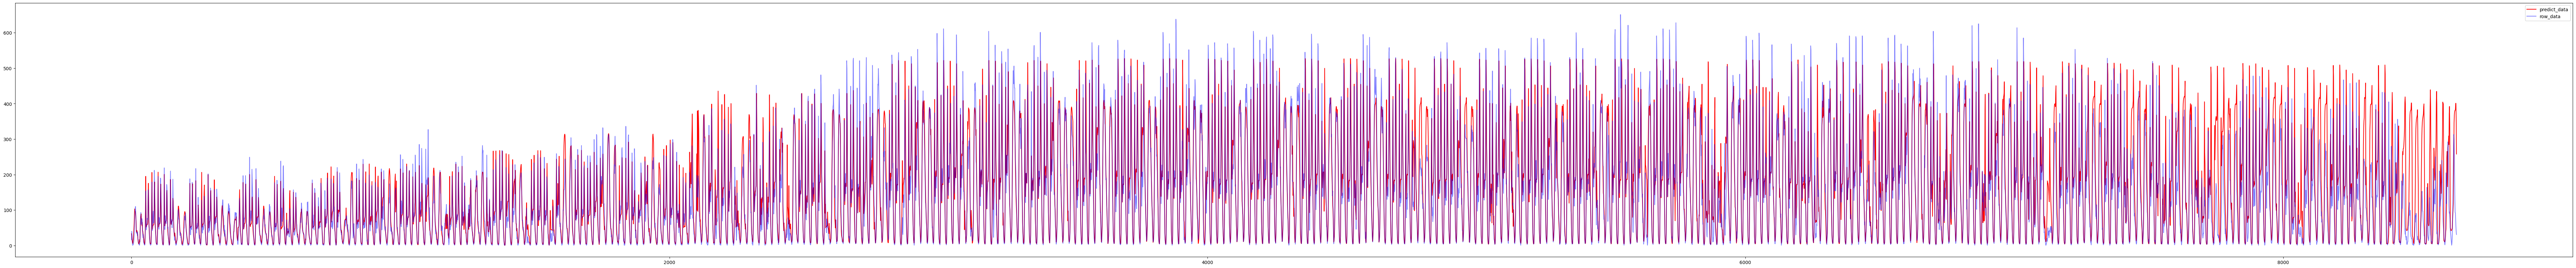

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try1.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

43.794349670410156
0.07954613014503761
1.4235968392179215


0
count  8645.000000
mean      1.423597
std       1.395405
min       0.079546
25%       0.926570
50%       1.115177
75%       1.442181
max      43.794350

# RNN2 try2

In [ ]:
train_prm[:, 0] = day_of_year_vec(train_prm[:, 0])#/365
train_prm[:, 1] = train_prm[:, 1]/4
train_prm[:, 3] = train_prm[:, 3]/12
train_prm[:, 4] = train_prm[:, 4]/24
train_prm[:, 6] = train_prm[:, 6]/6
train_prm[:, 7] = train_prm[:, 7]/4
train_prm = train_prm.astype(float)
print(train_prm)
train_trg = train_trg.astype(int)

test_prm[:, 0] = day_of_year_vec(test_prm[:, 0])/365
test_prm[:, 1] = test_prm[:, 1]/4
test_prm[:, 3] = test_prm[:, 3]/12
test_prm[:, 4] = test_prm[:, 4]/24
test_prm[:, 6] = test_prm[:, 6]/6
test_prm[:, 7] = test_prm[:, 7]/4
test_prm = test_prm.astype(float)
print(test_prm)

[[1.000e+00 2.500e-01 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 2.500e-01 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 2.500e-01 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 2.500e-01 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 2.500e-01 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 2.500e-01 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]


In [ ]:
print(f"train_parameter = \n{train_prm}:{train_prm.shape}")
print(f"train_target = {train_trg}:{train_trg.shape}")
print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[1.000e+00 2.500e-01 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 2.500e-01 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 2.500e-01 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 2.500e-01 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 2.500e-01 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 2.500e-01 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]:(8645, 13)
train_target = [16 40 32 ... 52 38 31]:(8645,)
test_parameter = 
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]:(8734, 13)


In [ ]:
# y = train_prm.reshape(train_prm.shape[0], train_prm.shape[1], 1)
train_prm2 = np.delete(train_prm, 0, 1)
y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trg.reshape(train_trg.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 400  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=100, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/100
217/217 [==============================] - 2s 10ms/step - loss: 18783.3750 - accuracy: 0.0140 - val_loss: 14393.2061 - val_accuracy: 0.0069
Epoch 2/100
217/217 [==============================] - 2s 10ms/step - loss: 18784.8359 - accuracy: 0.0140 - val_loss: 14456.9609 - val_accuracy: 0.0069
Epoch 3/100
217/217 [==============================] - 2s 7ms/step - loss: 18782.6914 - accuracy: 0.0140 - val_loss: 14401.1748 - val_accuracy: 0.0069
Epoch 4/100
217/217 [==============================] - 1s 6ms/step - loss: 18783.2402 - accuracy: 0.0140 - val_loss: 14422.1172 - val_accuracy: 0.0069
Epoch 5/100
217/217 [==============================] - 2s 7ms/step - loss: 18788.3242 - accuracy: 0.0140 - val_loss: 14450.7949 - val_accuracy: 0.0069
Epoch 6/100
217/217 [==============================] - 1s 6ms/step - loss: 18784.3691 - accuracy: 0.0140 - val_loss: 14412.8740 - val_accuracy: 0.0069
Epoch 7/100
217/217 [==============================] - 1s 6ms/step - loss: 18787.9199 - accu

In [ ]:
predicted = model.predict(y)
# model.evaluate(y,x)

271/271 [==============================] - 2s 7ms/step


In [ ]:
predicted

array([[78.20077 ],
       [78.20029 ],
       [78.19947 ],
       ...,
       [78.14883 ],
       [78.146416],
       [78.14236 ]], dtype=float32)

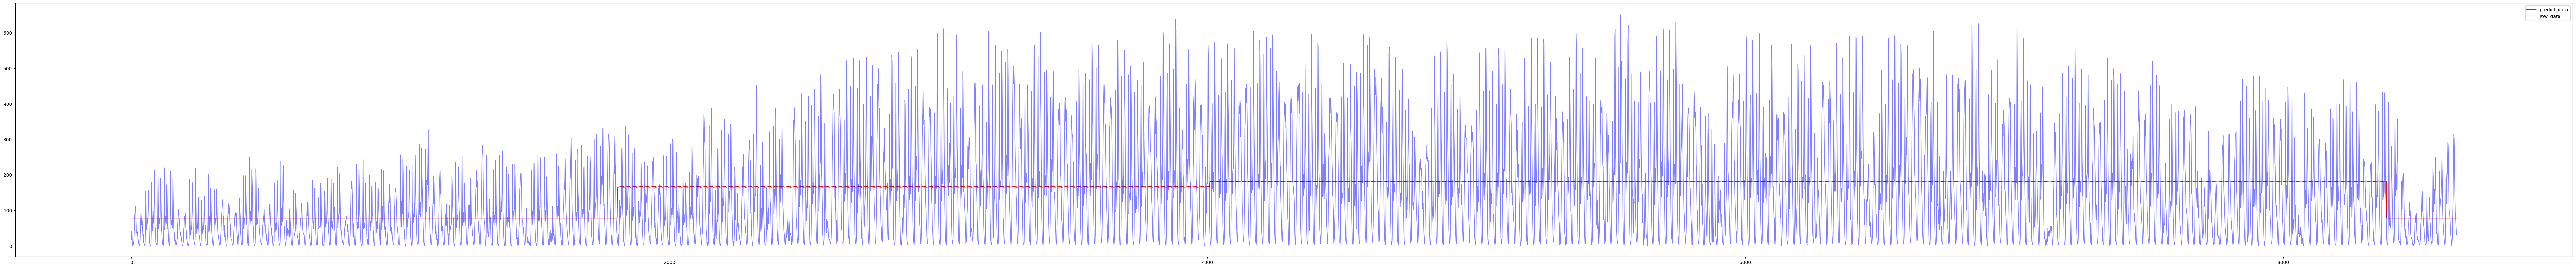

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try2.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

181.14405822753906
0.19294646463276427
7.092532296790872


0
count  8645.000000
mean      7.092532
std      17.297236
min       0.192946
25%       0.731017
50%       1.289106
75%       4.297932
max     181.144058

# RNN2 try3

In [ ]:
train_prm[:, 0] = day_of_year_vec(train_prm[:, 0])#/365
# train_prm[:, 1] = train_prm[:, 1]/4
# train_prm[:, 3] = train_prm[:, 3]/12
# train_prm[:, 4] = train_prm[:, 4]/24
# train_prm[:, 6] = train_prm[:, 6]/6
# train_prm[:, 7] = train_prm[:, 7]/4
train_prm = train_prm.astype(float)
print(train_prm)
train_trg = train_trg.astype(int)

test_prm[:, 0] = day_of_year_vec(test_prm[:, 0])/365
test_prm[:, 1] = test_prm[:, 1]/4
test_prm[:, 3] = test_prm[:, 3]/12
test_prm[:, 4] = test_prm[:, 4]/24
test_prm[:, 6] = test_prm[:, 6]/6
test_prm[:, 7] = test_prm[:, 7]/4
test_prm = test_prm.astype(float)
print(test_prm)

[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]


In [ ]:
print(f"train_parameter = \n{train_prm}:{train_prm.shape}")
print(f"train_target = {train_trg}:{train_trg.shape}")
print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]:(8645, 13)
train_target = [16 40 32 ... 52 38 31]:(8645,)
test_parameter = 
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]:(8734, 13)


In [ ]:
y = train_prm.reshape(train_prm.shape[0], train_prm.shape[1], 1)
# train_prm2 = np.delete(train_prm, 0, 1)
# y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trg.reshape(train_trg.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
217/217 [==============================] - 5s 12ms/step - loss: 24225.4141 - accuracy: 0.0140 - val_loss: 14451.9033 - val_accuracy: 0.0069
Epoch 2/300
217/217 [==============================] - 2s 7ms/step - loss: 18949.6035 - accuracy: 0.0140 - val_loss: 14361.2275 - val_accuracy: 0.0069
Epoch 3/300
217/217 [==============================] - 1s 6ms/step - loss: 18752.8164 - accuracy: 0.0140 - val_loss: 14414.3613 - val_accuracy: 0.0069
Epoch 4/300
217/217 [==============================] - 1s 6ms/step - loss: 18899.7344 - accuracy: 0.0140 - val_loss: 14285.0215 - val_accuracy: 0.0069
Epoch 5/300
217/217 [==============================] - 1s 7ms/step - loss: 17226.3125 - accuracy: 0.0140 - val_loss: 15338.2646 - val_accuracy: 0.0069
Epoch 6/300
217/217 [==============================] - 1s 7ms/step - loss: 16317.8770 - accuracy: 0.0140 - val_loss: 15692.0195 - val_accuracy: 0.0069
Epoch 7/300
217/217 [==============================] - 1s 6ms/step - loss: 15234.5576 - accur

In [ ]:
predicted = model.predict(y)
# model.evaluate(y,x)

271/271 [==============================] - 1s 3ms/step


In [ ]:
predicted

array([[ 23.747915],
       [ 23.546911],
       [ 22.641901],
       ...,
       [133.48521 ],
       [109.42646 ],
       [101.118385]], dtype=float32)

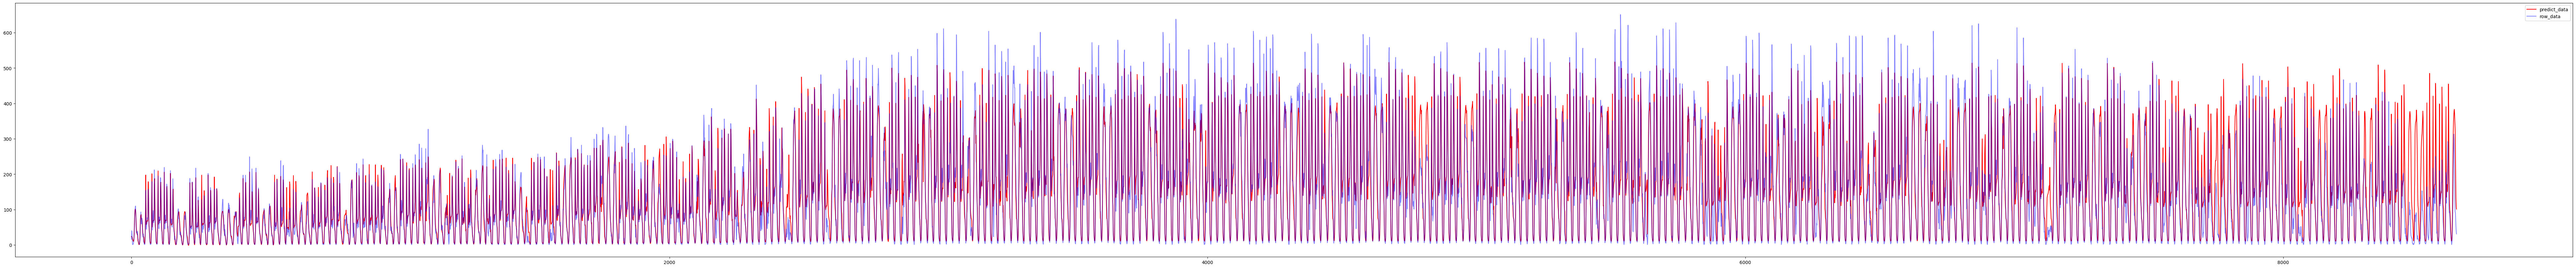

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try3.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

30.51438331604004
-1.2564607858657837
1.4119723933861366


0
count  8645.000000
mean      1.411972
std       1.312393
min      -1.256461
25%       0.891900
50%       1.067861
75%       1.399952
max      30.514383

# RNN2 try4

In [ ]:
train_prm[:, 0] = day_of_year_vec(train_prm[:, 0])/365
train_prm[:, 1] = train_prm[:, 1]/4
train_prm[:, 3] = train_prm[:, 3]/12
train_prm[:, 4] = train_prm[:, 4]/24
train_prm[:, 6] = train_prm[:, 6]/6
train_prm[:, 7] = train_prm[:, 7]/4
train_prm = train_prm.astype(float)
print(train_prm)
train_trg = train_trg.astype(int)

test_prm[:, 0] = day_of_year_vec(test_prm[:, 0])/365
test_prm[:, 1] = test_prm[:, 1]/4
test_prm[:, 3] = test_prm[:, 3]/12
test_prm[:, 4] = test_prm[:, 4]/24
test_prm[:, 6] = test_prm[:, 6]/6
test_prm[:, 7] = test_prm[:, 7]/4
test_prm = test_prm.astype(float)
print(test_prm)

[[0.00273973 0.25       0.         ... 0.2879     0.81       0.        ]
 [0.00273973 0.25       0.         ... 0.2727     0.8        0.        ]
 [0.00273973 0.25       0.         ... 0.2727     0.8        0.        ]
 ...
 [1.         0.25       0.         ... 0.4091     0.58       0.194     ]
 [1.         0.25       0.         ... 0.3939     0.62       0.1343    ]
 [1.         0.25       0.         ... 0.3788     0.66       0.        ]]
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]


In [ ]:
print(f"train_parameter = \n{train_prm}:{train_prm.shape}")
print(f"train_target = {train_trg}:{train_trg.shape}")
print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[0.00273973 0.25       0.         ... 0.2879     0.81       0.        ]
 [0.00273973 0.25       0.         ... 0.2727     0.8        0.        ]
 [0.00273973 0.25       0.         ... 0.2727     0.8        0.        ]
 ...
 [1.         0.25       0.         ... 0.4091     0.58       0.194     ]
 [1.         0.25       0.         ... 0.3939     0.62       0.1343    ]
 [1.         0.25       0.         ... 0.3788     0.66       0.        ]]:(8645, 13)
train_target = [16 40 32 ... 52 38 31]:(8645,)
test_parameter = 
[[0.00273973 0.25       1.         ... 0.3788     0.66       0.        ]
 [0.00273973 0.25       1.         ... 0.3485     0.66       0.1343    ]
 [0.00273973 0.25       1.         ... 0.3485     0.76       0.        ]
 ...
 [1.00273973 0.25       1.         ... 0.2576     0.6        0.1642    ]
 [1.00273973 0.25       1.         ... 0.2727     0.56       0.1343    ]
 [1.00273973 0.25       1.         ... 0.2727     0.65       0.1343    ]]:(8734, 13)


In [ ]:
y = train_prm.reshape(train_prm.shape[0], train_prm.shape[1], 1)
# train_prm2 = np.delete(train_prm, 0, 1)
# y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trg.reshape(train_trg.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.2, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
217/217 [==============================] - 4s 9ms/step - loss: 24612.6934 - accuracy: 0.0140 - val_loss: 14562.0869 - val_accuracy: 0.0069
Epoch 2/300
217/217 [==============================] - 2s 8ms/step - loss: 19010.9062 - accuracy: 0.0140 - val_loss: 14365.3203 - val_accuracy: 0.0069
Epoch 3/300
217/217 [==============================] - 2s 8ms/step - loss: 18782.1738 - accuracy: 0.0140 - val_loss: 14435.8428 - val_accuracy: 0.0069
Epoch 4/300
217/217 [==============================] - 2s 8ms/step - loss: 18781.7969 - accuracy: 0.0140 - val_loss: 14441.0264 - val_accuracy: 0.0069
Epoch 5/300
217/217 [==============================] - 2s 9ms/step - loss: 18783.5684 - accuracy: 0.0140 - val_loss: 14421.4238 - val_accuracy: 0.0069
Epoch 6/300
217/217 [==============================] - 1s 6ms/step - loss: 18783.2246 - accuracy: 0.0140 - val_loss: 14438.9004 - val_accuracy: 0.0069
Epoch 7/300
217/217 [==============================] - 1s 6ms/step - loss: 18780.5391 - accura

In [ ]:
predicted = model.predict(y)
# model.evaluate(y,x)

271/271 [==============================] - 1s 2ms/step


In [ ]:
predicted

array([[145.78915],
       [145.78915],
       [145.78918],
       ...,
       [146.21979],
       [146.2198 ],
       [146.21979]], dtype=float32)

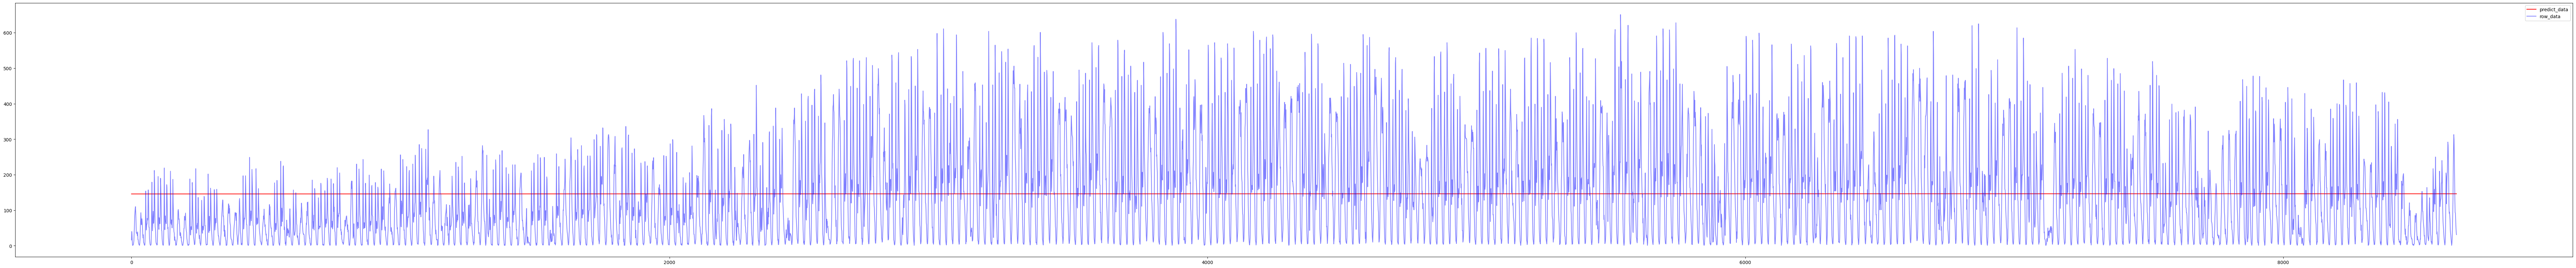

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try4.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

146.3040771484375
0.22459095194592454
7.738191393701906


0
count  8645.000000
mean      7.738191
std      19.792775
min       0.224591
25%       0.692872
50%       1.340045
75%       4.704696
max     146.304077

# RNN2 try5

In [ ]:
train_prm[:, 0] = day_of_year_vec(train_prm[:, 0])#/365
# train_prm[:, 1] = train_prm[:, 1]/4
# train_prm[:, 3] = train_prm[:, 3]/12
# train_prm[:, 4] = train_prm[:, 4]/24
# train_prm[:, 6] = train_prm[:, 6]/6
# train_prm[:, 7] = train_prm[:, 7]/4
train_prm = train_prm.astype(float)
print(train_prm)
train_trg = train_trg.astype(int)

test_prm[:, 0] = day_of_year_vec(test_prm[:, 0])#/365
# test_prm[:, 1] = test_prm[:, 1]/4
# test_prm[:, 3] = test_prm[:, 3]/12
# test_prm[:, 4] = test_prm[:, 4]/24
# test_prm[:, 6] = test_prm[:, 6]/6
# test_prm[:, 7] = test_prm[:, 7]/4
test_prm = test_prm.astype(float)
print(test_prm)

[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]
[[1.000e+00 1.000e+00 1.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 ... 3.485e-01 6.600e-01 1.343e-01]
 [1.000e+00 1.000e+00 1.000e+00 ... 3.485e-01 7.600e-01 0.000e+00]
 ...
 [3.660e+02 1.000e+00 1.000e+00 ... 2.576e-01 6.000e-01 1.642e-01]
 [3.660e+02 1.000e+00 1.000e+00 ... 2.727e-01 5.600e-01 1.343e-01]
 [3.660e+02 1.000e+00 1.000e+00 ... 2.727e-01 6.500e-01 1.343e-01]]


In [ ]:
print(f"train_parameter = \n{train_prm}:{train_prm.shape}")
print(f"train_target = {train_trg}:{train_trg.shape}")
print(f"test_parameter = \n{test_prm}:{test_prm.shape}")

train_parameter = 
[[1.000e+00 1.000e+00 0.000e+00 ... 2.879e-01 8.100e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 [1.000e+00 1.000e+00 0.000e+00 ... 2.727e-01 8.000e-01 0.000e+00]
 ...
 [3.650e+02 1.000e+00 0.000e+00 ... 4.091e-01 5.800e-01 1.940e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.939e-01 6.200e-01 1.343e-01]
 [3.650e+02 1.000e+00 0.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]]:(8645, 13)
train_target = [16 40 32 ... 52 38 31]:(8645,)
test_parameter = 
[[1.000e+00 1.000e+00 1.000e+00 ... 3.788e-01 6.600e-01 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 ... 3.485e-01 6.600e-01 1.343e-01]
 [1.000e+00 1.000e+00 1.000e+00 ... 3.485e-01 7.600e-01 0.000e+00]
 ...
 [3.660e+02 1.000e+00 1.000e+00 ... 2.576e-01 6.000e-01 1.642e-01]
 [3.660e+02 1.000e+00 1.000e+00 ... 2.727e-01 5.600e-01 1.343e-01]
 [3.660e+02 1.000e+00 1.000e+00 ... 2.727e-01 6.500e-01 1.343e-01]]:(8734, 13)


In [ ]:
y = train_prm.reshape(train_prm.shape[0], train_prm.shape[1], 1)
# train_prm2 = np.delete(train_prm, 0, 1)
# y = train_prm2.reshape(train_prm2.shape[0], train_prm2.shape[1], 1)
x = train_trg.reshape(train_trg.shape[0], 1)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
length_of_sequence = y.shape[1]
#print(length_of_sequence)
in_out_neurons = 1 #入出力ノード数
n_hidden = 600  #隠れ層 -> 数が多い程，学習モデルの複雑さが増加

model = Sequential()
model.add(LSTM(n_hidden, input_shape=(length_of_sequence, in_out_neurons), return_sequences=False))
model.add(Dense(in_out_neurons))
model.add(Activation("linear"))
optimizer = Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer, metrics=["accuracy"])

In [ ]:
x.shape

(8645, 1)

In [ ]:
ES = EarlyStopping(mode='auto', patience=20)
model.fit(y, x,
          epochs=300, #100 epochで学習
          validation_split=0.1, #学習データの10%をvalidationに用いる
          callbacks=[ES]
          )

Epoch 1/300
244/244 [==============================] - 4s 8ms/step - loss: 23049.0645 - accuracy: 0.0127 - val_loss: 12006.8506 - val_accuracy: 0.0104
Epoch 2/300
244/244 [==============================] - 1s 6ms/step - loss: 18574.0352 - accuracy: 0.0129 - val_loss: 12604.5283 - val_accuracy: 0.0104
Epoch 3/300
244/244 [==============================] - 1s 6ms/step - loss: 18494.9355 - accuracy: 0.0129 - val_loss: 12684.6084 - val_accuracy: 0.0104
Epoch 4/300
244/244 [==============================] - 2s 6ms/step - loss: 18498.5801 - accuracy: 0.0129 - val_loss: 12605.0400 - val_accuracy: 0.0104
Epoch 5/300
244/244 [==============================] - 1s 6ms/step - loss: 18496.3535 - accuracy: 0.0129 - val_loss: 12580.2441 - val_accuracy: 0.0104
Epoch 6/300
244/244 [==============================] - 2s 7ms/step - loss: 18498.8203 - accuracy: 0.0129 - val_loss: 12644.0459 - val_accuracy: 0.0104
Epoch 7/300
244/244 [==============================] - 2s 8ms/step - loss: 18498.5117 - accura

In [ ]:
predicted = model.predict(y)
model.evaluate(y,x)

271/271 [==============================] - 1s 5ms/step - loss: 1925.2701 - accuracy: 0.0126


[1925.2701416015625, 0.012608444318175316]

In [241]:
r2 = 1 -  np.sum((predicted - x)**2) / np.sum((x - np.mean(x))**2)
print(r2)

0.8924417925706255


In [ ]:
predicted

array([[ 13.4244585],
       [ 20.300941 ],
       [ 19.759491 ],
       ...,
       [101.59575  ],
       [ 91.51565  ],
       [ 84.21822  ]], dtype=float32)

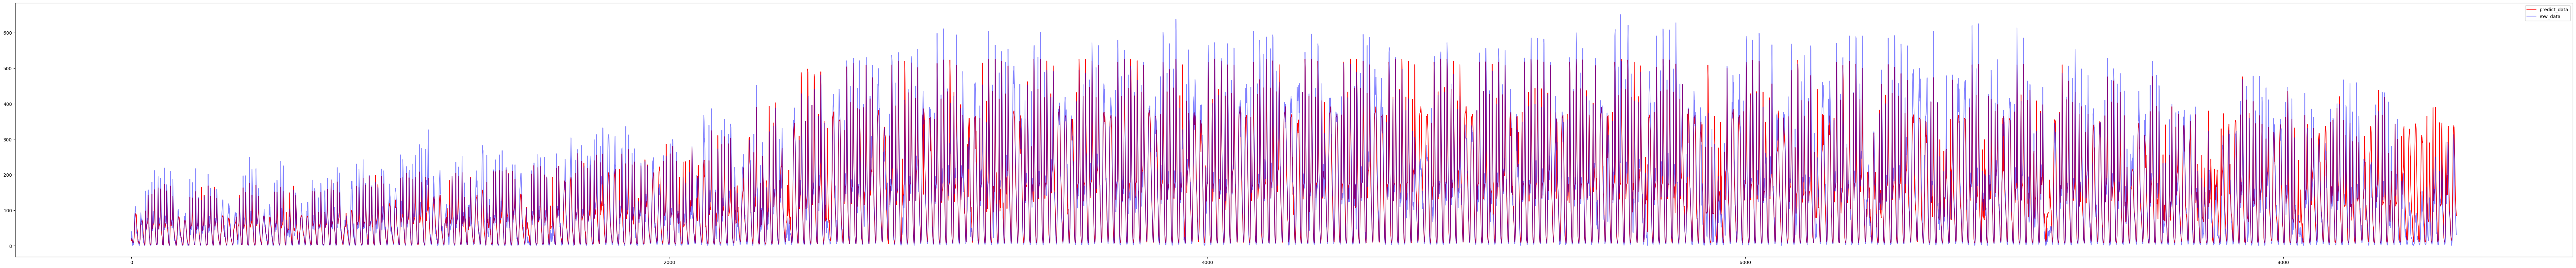

In [ ]:
plt.figure(figsize=(100, 10))
plt.plot(range(0,len(predicted)),predicted, color="r", label="predict_data")
plt.plot(range(0, len(x)), x, color="b", label="row_data", alpha=0.5)
plt.legend()
plt.savefig("/content/drive/MyDrive/backups/講義関係/auwin_classes/6_水2_自然言語処理入門_auwin/第2回/RNN2_try5.png")
plt.show()

In [ ]:
x

array([[16],
       [40],
       [32],
       ...,
       [52],
       [38],
       [31]])

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

39.02351379394531
0.21039252281188964
1.283749922249485


0
count  8645.000000
mean      1.283750
std       1.191883
min       0.210393
25%       0.840249
50%       0.983929
75%       1.257660
max      39.023514

In [ ]:
y2 = test_prm.reshape(test_prm.shape[0], test_prm.shape[1], 1)

predicted2 = model.predict(y)
display(predicted2)

271/271 [==============================] - 1s 3ms/step


array([[ 13.4244585],
       [ 20.300941 ],
       [ 19.759491 ],
       ...,
       [101.59575  ],
       [ 91.51565  ],
       [ 84.21822  ]], dtype=float32)

# RNN2 try_log

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

32.68954086303711
-0.3822050094604492
1.2680168148467257


0
count  8645.000000
mean      1.268017
std       1.125252
min      -0.382205
25%       0.890359
50%       1.030566
75%       1.263783
max      32.689541

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

46.06301498413086
0.19385501110192502
1.4244181512629284


0
count  8645.000000
mean      1.424418
std       1.369031
min       0.193855
25%       0.915077
50%       1.075477
75%       1.387664
max      46.063015

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

29.253528594970703
0.1762872338294983
1.3442971642130765


0
count  8645.000000
mean      1.344297
std       1.323133
min       0.176287
25%       0.834628
50%       0.994066
75%       1.319778
max      29.253529

In [ ]:
predicted
score3 = (predicted / x)
print(score3.max())
print(score3.min())
print(score3.mean())

pd.DataFrame(score3).describe()

30.74820556640625
-1.1985324621200562
1.2526435755235432


0
count  8645.000000
mean      1.252644
std       1.097423
min      -1.198532
25%       0.872864
50%       1.031411
75%       1.271193
max      30.748206

In [ ]:
train_prm.shape

(8645, 13)